In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
df = pd.read_csv('./Data/Last_year.csv', parse_dates=['date'])

In [3]:
df.head()

,date,Year,Month,Day,cost,clicks,cpc,num_kw,searches,conv,...,.9,.10,.11,.12,.13,.14,.15,.16,.17,.18
0,2017-12-19,2017,12,19,7219.519994,10627,0.679356,99286,331567.497601,122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-12-20,2017,12,20,8242.319990,11447,0.720042,97854,320144.680961,136,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-12-21,2017,12,21,7968.239991,10775,0.739512,93688,304643.467821,125,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-12-22,2017,12,22,5952.889999,8220,0.724196,78269,262726.741308,123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-12-23,2017,12,23,4283.449997,6119,0.700025,58380,193867.167840,76,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def plot_daily_hourly_metrics(df, xcol_name='date', metrics=None):
    fig, ax1 = plt.subplots()
    ax1.plot(df[xcol_name], df[metrics])
    ax1.set_xlabel('Year Month_day')
    ax1.set_ylabel(metrics)
    days = mdates.DayLocator(interval=15)   # every day
    months = mdates.MonthLocator(interval=3)
    years = mdates.YearLocator()# every 2 months
    daysFmt = mdates.DateFormatter('%b %d')
    yearsFmt = mdates.DateFormatter('%Y')
    
    ax1.xaxis.set_major_locator(years)
    ax1.xaxis.set_major_formatter(yearsFmt)
    ax1.xaxis.set_minor_locator(days)
    ax1.xaxis.set_minor_formatter(daysFmt)
        
    datemin = np.datetime64(df[xcol_name].iloc[0])
    datemax = np.datetime64(df[xcol_name].iloc[-1])
    ax1.set_xlim(datemin, datemax)
    
    plt.tick_params(axis='x', which='minor', labelsize=10, labelrotation=45, length=3)
    plt.tick_params(axis='x', which='major', labelsize=15, labelrotation=45, length=10)
    
    fig.set_size_inches(18.5, 10.5, forward=True)
    fig.suptitle(metrics, fontsize=16)
    plt.legend(metrics)
    plt.show()

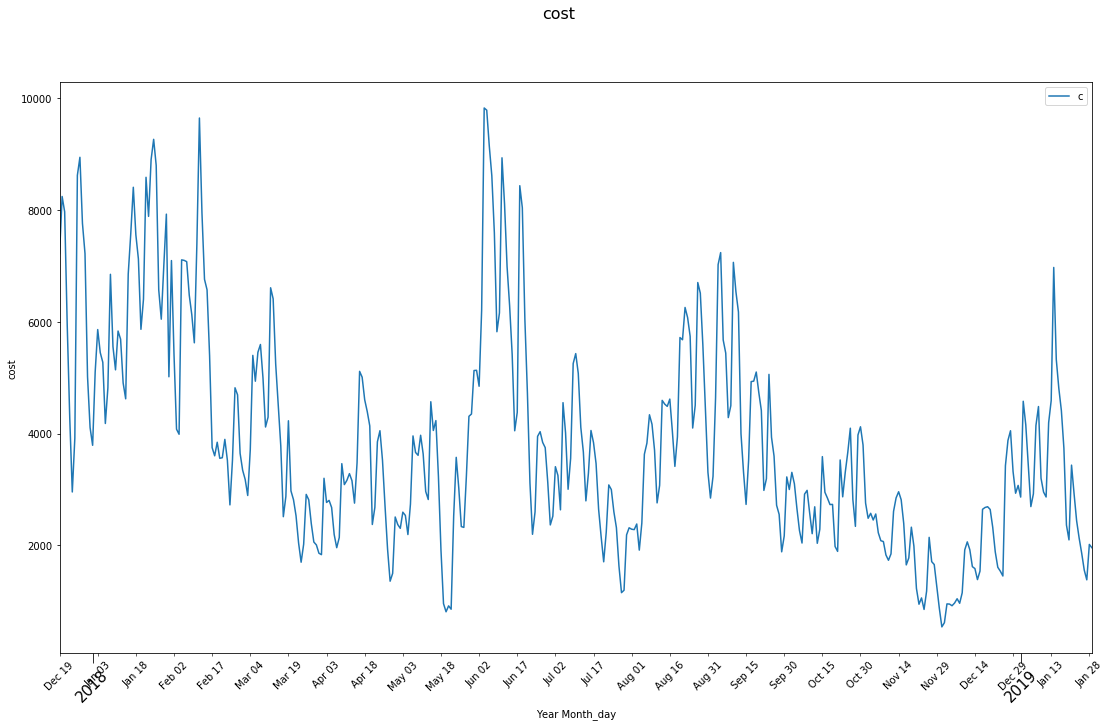

In [5]:
plot_daily_hourly_metrics(df, xcol_name='date', metrics='cost')

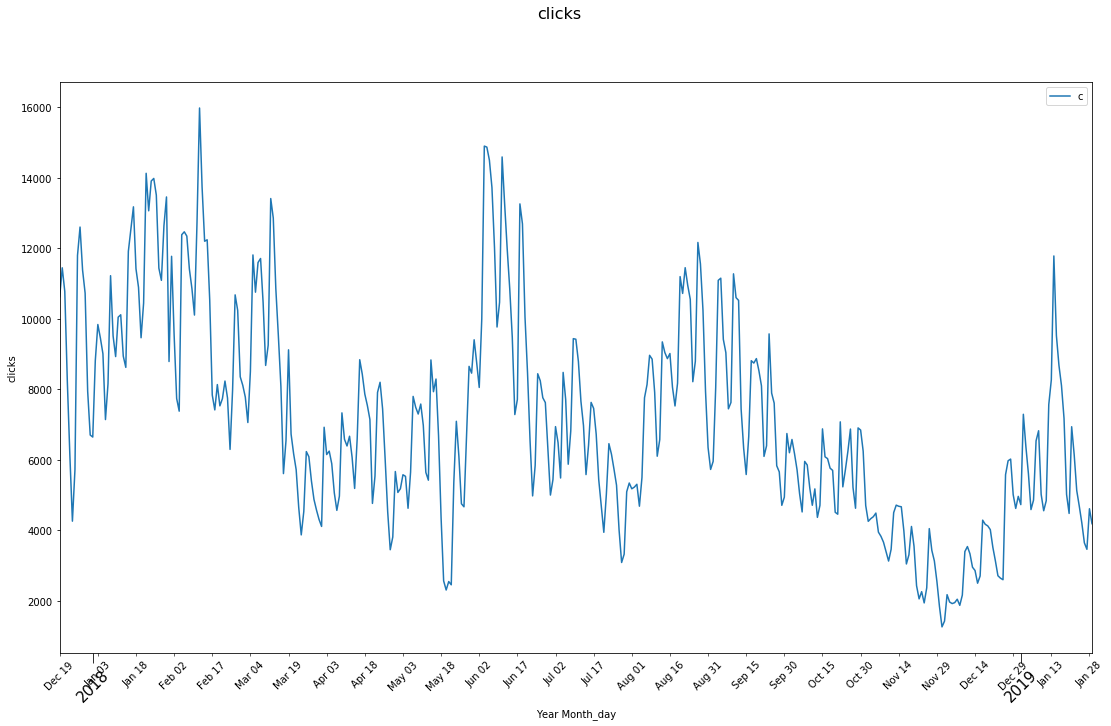

In [6]:
plot_daily_hourly_metrics(df, xcol_name='date', metrics='clicks')

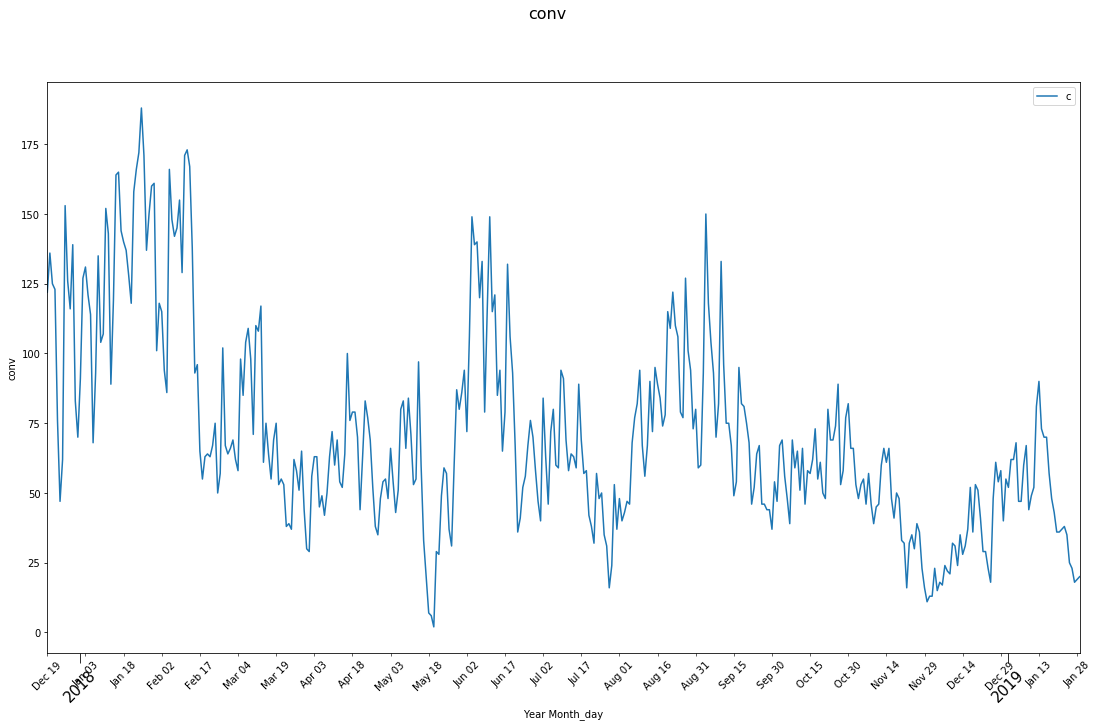

In [7]:
plot_daily_hourly_metrics(df, xcol_name='date', metrics='conv')

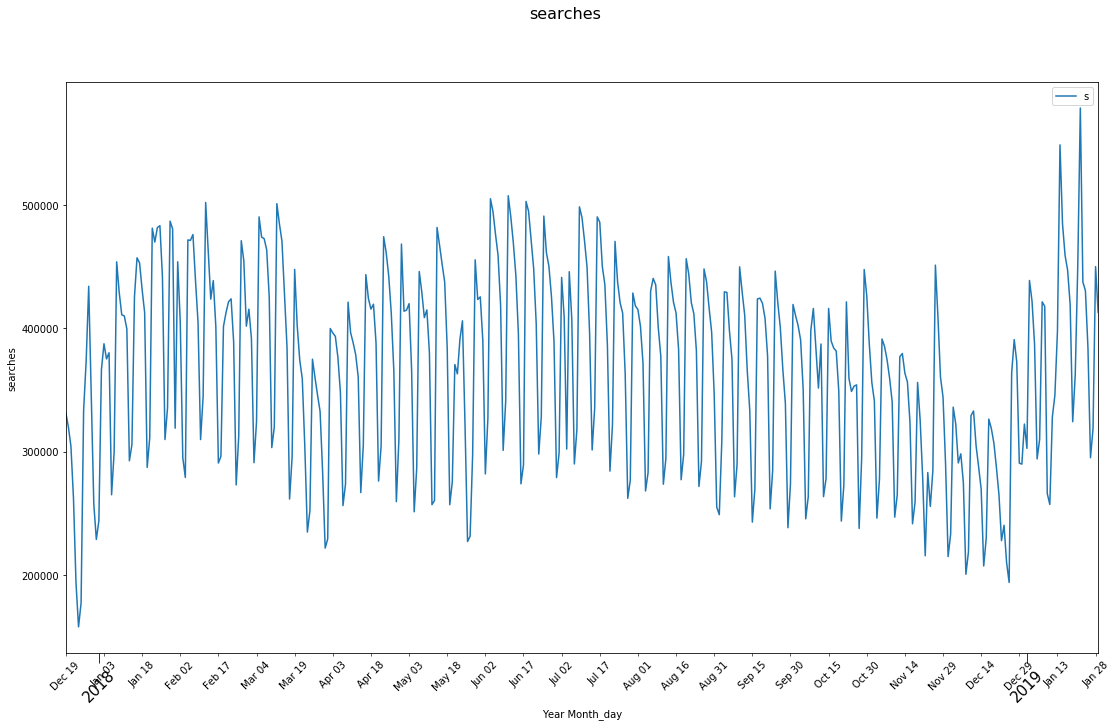

In [8]:
plot_daily_hourly_metrics(df, xcol_name='date', metrics='searches')